<a href="https://colab.research.google.com/github/wagnernsct/NF3-BIG-DATA-WAGNER/blob/master/NF3_BIG_DATA_Wagner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Questão 1 - Importando o Dataset
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wagnernsct/NF3-BIG-DATA-WAGNER/master/world_alcohol.csv", sep = ",")
type(df)
df



,Year,WHO region,Country,Beverage Types,Display Value
0,1986,Western Pacific,Viet Nam,Wine,0.00
1,1986,Americas,Uruguay,Other,0.50
2,1985,Africa,Cte d'Ivoire,Wine,1.62
3,1986,Americas,Colombia,Beer,4.27
4,1987,Americas,Saint Kitts and Nevis,Beer,1.98
...,...,...,...,...,...
95,1984,Africa,Niger,Other,0.00
96,1985,Europe,Luxembourg,Wine,7.38
97,1984,South-East Asia,Indonesia,Wine,0.00
98,1984,Africa,Equatorial Guinea,Wine,0.00


In [5]:
# Questão 1 - Letra A | Agrupe os dados por tipo de bebidas

bebidas = df.groupby("Beverage Types")
bebidas.describe()

Year                                                          \
               count         mean       std     min      25%     50%     75%   
Beverage Types                                                                 
Beer            24.0  1986.958333  1.899180  1984.0  1985.75  1987.0  1989.0   
Other           28.0  1986.107143  1.547741  1984.0  1985.00  1986.0  1987.0   
Spirits         21.0  1985.523810  1.364516  1984.0  1984.00  1985.0  1986.0   
Wine            27.0  1986.111111  1.552500  1984.0  1985.00  1986.0  1987.0   

                       Display Value                                       \
                   max         count      mean       std  min   25%   50%   
Beverage Types                                                              
Beer            1989.0          24.0  1.479167  1.824993  0.0  0.10  0.66   
Other           1989.0          23.0  0.649130  1.556937  0.0  0.00  0.00   
Spirits         1989.0          21.0  1.474762  1.289285  0.0  0.08  1.62   
Wine            1989.0          27.0  0.866296  1.730992  0.0  0.00  0.04   

                              
                   75%   max  
Beverage Types                
Beer            2.2225  6.82  
Other           0.4000  6.10  
Spirits         2.2500  4.51  
Wine            1.0800  7.38

In [6]:
from pandas.core.groupby import groupby
# Questão 1 - Letra B | Agrupe os dados por Região e por Ano

agrupamento = df.groupby(["Year", "Country"])
agrupamento.describe()


Display Value                                    \
                                  count  mean std   min   25%   50%   75%   
Year Country                                                                
1984 Afghanistan                    1.0  0.00 NaN  0.00  0.00  0.00  0.00   
     Bahrain                        1.0  2.22 NaN  2.22  2.22  2.22  2.22   
     China                          1.0  0.03 NaN  0.03  0.03  0.03  0.03   
     Costa Rica                     1.0  0.06 NaN  0.06  0.06  0.06  0.06   
     El Salvador                    1.0  1.81 NaN  1.81  1.81  1.81  1.81   
...                                 ...   ...  ..   ...   ...   ...   ...   
1989 Somalia                        1.0  0.00 NaN  0.00  0.00  0.00  0.00   
     Suriname                       1.0  0.04 NaN  0.04  0.04  0.04  0.04   
     Syrian Arab Republic           1.0  0.00 NaN  0.00  0.00  0.00  0.00   
     Uganda                         1.0  0.12 NaN  0.12  0.12  0.12  0.12   
     Zimbabwe                       1.0  0.19 NaN  0.19  0.19  0.19  0.19   

                                 
                            max  
Year Country                     
1984 Afghanistan           0.00  
     Bahrain               2.22  
     China                 0.03  
     Costa Rica            0.06  
     El Salvador           1.81  
...                         ...  
1989 Somalia               0.00  
     Suriname              0.04  
     Syrian Arab Republic  0.00  
     Uganda                0.12  
     Zimbabwe              0.19  

[98 rows x 8 columns]

In [7]:
# Questão 1 - Letra C | Seção de Contagens: Contar a ocorrência de Regiões, de Países e a soma da coluna de valores por Bebida.

secao = df.groupby(["WHO region", "Country"]).agg({"Display Value": "sum", "Beverage Types": "count"}).reset_index()
print(secao)




         WHO region                           Country  Display Value  \
0            Africa                            Angola           0.39   
1            Africa                          Botswana           0.20   
2            Africa                      Burkina Faso           0.01   
3            Africa                          Cameroon           0.01   
4            Africa                           Comoros           0.02   
..              ...                               ...            ...   
75  Western Pacific                             China           0.03   
76  Western Pacific  Lao People's Democratic Republic           0.00   
77  Western Pacific  Micronesia (Federated States of)           0.00   
78  Western Pacific                  Papua New Guinea           0.08   
79  Western Pacific                          Viet Nam           0.16   

    Beverage Types  
0                1  
1                1  
2                1  
3                1  
4                2  
..       

Média:  1.1030526315789473


Moda:  0    0.0
Name: Display Value, dtype: float64


Mediana:  0.19


Estatística:  count    95.000000
mean      1.103053
std       1.642623
min       0.000000
25%       0.000000
50%       0.190000
75%       1.820000
max       7.380000
Name: Display Value, dtype: float64




<Axes: xlabel='Beverage Types'>

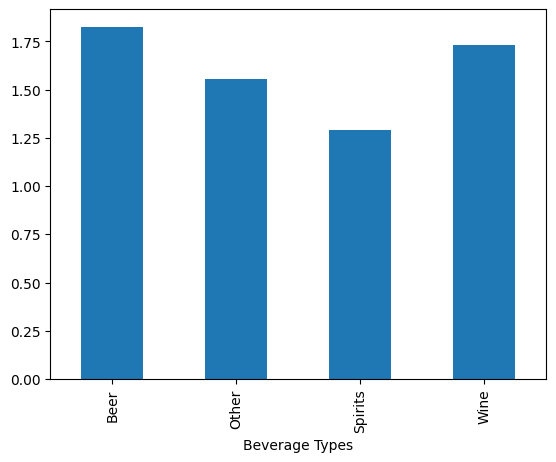

In [4]:
# Questão 1 - Letra D | Realize análises estatísticas da coluna dos valores: Média, Moda, Mediana, Estatística Descritiva e Gráfico de comparação dos valores agrupados por tipo de bebida.

# Calcular a média de uma coluna específica
media = df["Display Value"].mean() # Média
print("Média: ", media)
print("\n")

moda = df["Display Value"].mode() # Moda
print("Moda: ", moda)
print("\n")

mediana = df["Display Value"].median() # Mediana
print("Mediana: ", mediana)
print("\n")

estatistica = df["Display Value"].describe() # Estatística Descritiva
print("Estatística: ", estatistica)
print("\n")

grafico = df.groupby('Beverage Types')['Display Value'].std()
grafico
grafico.plot.bar(x='Beverage Types', y = 'Display Value')



In [8]:
# Questão 1 - Letra E | Mostre resultados de acordo com alguns critérios: Mostrar a coluna de bebidas do ano de 1985.
resultado = df.loc[df["Year"] == 1985].groupby(["Year", "Beverage Types"]).std()
resultado



#df_auxiliar = df.drop(columns = ["WHO Region", "Country", "Display Value"])


<ipython-input-8-9e31d0af40e1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultado = df.loc[df["Year"] == 1985].groupby(["Year", "Beverage Types"]).std()


Display Value
Year Beverage Types               
1985 Beer                 0.014142
     Other                0.365951
     Spirits              1.407427
     Wine                 2.742702

In [ ]:
# Questão 1 - Letra E | Mostre resultados de acordo com alguns critérios: Mostrar a coluna de Região com valores acima de 4

regiao = df.loc[df["Display Value"] > 4].groupby(["WHO region", "Display Value"]).std()
regiao

<ipython-input-4-026f1fe1087c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regiao = df.loc[df["Display Value"] > 4].groupby(["WHO region", "Display Value"]).std()


Year
WHO region Display Value      
Africa     4.48            NaN
           6.10            NaN
Americas   4.27            NaN
           4.51            NaN
Europe     4.43            NaN
           5.10            NaN
           6.82            NaN
           7.38            NaN